In [1]:
import scipy.io as sio    
import numpy as np
import pandas as pd
import glob,os
from matplotlib import pylab as plt
import CFS
import mrmr

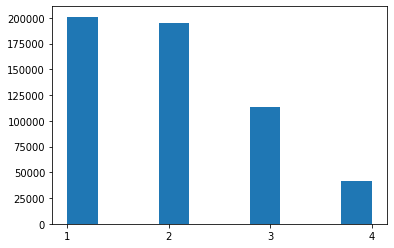

In [2]:
# load data
path = '/Users/lyuliangyi/Desktop/HKCOCHE/feature_selection/All_features'
file = glob.glob(os.path.join(path,'*.mat'))

label = []
for f in file:
    label.append(f[65:-4])
    
d={}
for i in range(len(file)):
    mat = sio.loadmat(file[i])
    d['mat_'+label[i]] = pd.DataFrame(mat['feature_person'],
                                     columns=['PTTp','PTTf','upTime','BfTime','DownTime',
                                              'FbTime','BbTime','CfSlope','BcSlope','CbSlope',
                                              'sys_vol','sys_notch_vol','notch_dia_vol','dia_vol','sys_dia_RI',
                                              'sys_foot_RI', 'sys_notch_RI', 'dia_notch_RI', 'HR', 'PSR',
                                             'PSR1', 'PSR2', 'PSR3', 'PSR4', 'PSR5',
                                             'PSR6', 'PSR7', 'PSR8', 'SBP', 'DBP',
                                             'MBP'])
    
# classification of bp
for l in label:
    df = d['mat_'+l]
    df['class'] = ''
    for i in range(len(df)):
        if df.loc[i,'SBP'] >= 160 or df.loc[i,'DBP'] >= 100: # stage 1 hypertension 
            df.loc[i,'class'] = '4' 
        elif df.loc[i,'SBP'] >= 140 or df.loc[i,'DBP'] >= 90: # stage 1 hypertension 
            df.loc[i,'class'] = '3'
        elif df.loc[i,'SBP'] >= 120 or df.loc[i,'DBP'] >= 80: # prehypertension
            df.loc[i,'class'] = '2'
        else:
            df.loc[i,'class'] = '1'
    d['mat_'+l] = df

# random select 50% data
d1 = []
sample_rate = 0.5

for l in label:
    m, n = d['mat_'+l].shape
    df = d['mat_'+l].sample(n=int(m*sample_rate),random_state=2023)
    d1.append(df)
df_sample = pd.concat(d1)
df_sample = df_sample.reset_index(drop=True)
df_sample = df_sample[['PTTp','PTTf','upTime','BfTime','DownTime',
                        'FbTime','BbTime','CfSlope','BcSlope','CbSlope',
                        'sys_vol','sys_notch_vol','notch_dia_vol','dia_vol','sys_dia_RI',
                        'sys_foot_RI', 'sys_notch_RI', 'dia_notch_RI', 'HR', 'PSR',
                        'PSR1', 'PSR2', 'PSR3', 'PSR4', 'PSR5',
                        'PSR6', 'PSR7', 'PSR8','SBP', 'DBP', 'MBP','class']]

plt.hist(df_sample['class'])
plt.show()    

In [3]:
# normalization
df_sample = df_sample[['PTTp','PTTf','upTime','BfTime','DownTime',
                        'FbTime','BbTime','CfSlope','BcSlope','CbSlope',
                        'sys_vol','sys_notch_vol','notch_dia_vol','dia_vol','sys_dia_RI',
                        'sys_foot_RI', 'sys_notch_RI', 'dia_notch_RI', 'HR', 'PSR',
                        'PSR1', 'PSR2', 'PSR3', 'PSR4', 'PSR5',
                        'PSR6', 'PSR7', 'PSR8','class']]

df_sample1 = df_sample.drop('class', axis=1)
df_norm = (df_sample1 - df_sample1.min())/(df_sample1.max() - df_sample1.min())
df_norm['class'] = df_sample['class']
df_norm

,PTTp,PTTf,upTime,BfTime,DownTime,FbTime,BbTime,CfSlope,BcSlope,CbSlope,...,PSR,PSR1,PSR2,PSR3,PSR4,PSR5,PSR6,PSR7,PSR8,class
0,0.315126,0.333333,0.210526,0.274074,0.202703,0.166889,0.112202,0.027969,0.047128,0.163040,...,0.275904,0.166642,0.174393,0.086185,0.168905,0.507176,0.232035,0.073103,0.105885,1
1,0.319328,0.337662,0.210526,0.274074,0.202703,0.166889,0.112202,0.030230,0.046400,0.163378,...,0.267777,0.173625,0.189596,0.089769,0.167461,0.533416,0.233552,0.077152,0.077152,1
2,0.306723,0.329004,0.200000,0.266667,0.209459,0.166889,0.110799,0.026324,0.046214,0.145890,...,0.256806,0.183752,0.183752,0.092421,0.152378,0.559973,0.256738,0.083025,0.083025,1
3,0.302521,0.329004,0.189474,0.274074,0.216216,0.165554,0.110799,0.034745,0.050346,0.137627,...,0.247460,0.193087,0.193087,0.097117,0.162071,0.553375,0.283572,0.088438,0.088438,1
4,0.315126,0.337662,0.200000,0.259259,0.209459,0.168224,0.110799,0.034008,0.048581,0.152102,...,0.264425,0.176630,0.183311,0.090252,0.144982,0.540990,0.266330,0.078895,0.078895,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551650,0.298319,0.324675,0.189474,0.340741,0.209459,0.148198,0.105189,0.006136,0.033578,0.162148,...,0.182141,0.285059,0.319253,0.399697,0.257579,0.426875,0.317468,0.141774,0.141774,1
551651,0.382353,0.402597,0.210526,0.333333,0.256757,0.150868,0.106592,0.000787,0.022479,0.086691,...,0.145266,0.373482,0.389478,0.478343,0.349401,0.493752,0.341734,0.193051,0.193051,1
551652,0.373950,0.398268,0.200000,0.355556,0.229730,0.145527,0.105189,0.004633,0.031061,0.140787,...,0.179500,0.290185,0.325400,0.418529,0.262902,0.448269,0.271560,0.144746,0.144746,1
551653,0.378151,0.398268,0.210526,0.325926,0.277027,0.150868,0.105189,0.007498,0.027418,0.098681,...,0.178688,0.291793,0.329769,0.436253,0.264571,0.428042,0.285005,0.145679,0.145679,1


In [4]:
#RFE
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeClassifier
X =df_norm[['PTTp','PTTf','upTime','BfTime','DownTime',
                        'FbTime','BbTime','CfSlope','BcSlope','CbSlope',
                        'sys_vol','sys_notch_vol','notch_dia_vol','dia_vol','sys_dia_RI',
                        'sys_foot_RI', 'sys_notch_RI', 'dia_notch_RI', 'HR', 'PSR',
                        'PSR1', 'PSR2', 'PSR3', 'PSR4', 'PSR5',
                        'PSR6', 'PSR7', 'PSR8']].to_numpy()
X = X.astype(float)
y =df_norm['class'].to_numpy()
y=y.astype('int')
n_samples, n_features = X.shape

estimator = DecisionTreeClassifier()
rfe = RFE(estimator, n_features_to_select=1, step=1)
rfe.fit(X, y)

features = ['PTTp','PTTf','upTime','BfTime','DownTime',
                        'FbTime','BbTime','CfSlope','BcSlope','CbSlope',
                        'sys_vol','sys_notch_vol','notch_dia_vol','dia_vol','sys_dia_RI',
                        'sys_foot_RI', 'sys_notch_RI', 'dia_notch_RI', 'HR', 'PSR',
                        'PSR1', 'PSR2', 'PSR3', 'PSR4', 'PSR5',
                        'PSR6', 'PSR7', 'PSR8']

print('Feature: ', features)
print('Selected: ',rfe.support_)
print('Rank: ',rfe.ranking_)

Feature:  ['PTTp', 'PTTf', 'upTime', 'BfTime', 'DownTime', 'FbTime', 'BbTime', 'CfSlope', 'BcSlope', 'CbSlope', 'sys_vol', 'sys_notch_vol', 'notch_dia_vol', 'dia_vol', 'sys_dia_RI', 'sys_foot_RI', 'sys_notch_RI', 'dia_notch_RI', 'HR', 'PSR', 'PSR1', 'PSR2', 'PSR3', 'PSR4', 'PSR5', 'PSR6', 'PSR7', 'PSR8']
Selected:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False]
Rank:  [ 6 10 24 19 17 12 21 14  4  9 25 15 11 26 28  8  2 16  7 22 27 18  5 13
  1 23  3 20]


In [5]:
df_rfe = pd.DataFrame({'Features':features,
                      'Selected':rfe.support_,
                      'Rank':rfe.ranking_,
                      'Weight_rfe':1/rfe.ranking_})
df_rfe.sort_values(by=['Weight_rfe'], ascending = False)

,Features,Selected,Rank,Weight_rfe
24,PSR5,True,1,1.000000
16,sys_notch_RI,False,2,0.500000
26,PSR7,False,3,0.333333
8,BcSlope,False,4,0.250000
22,PSR3,False,5,0.200000
0,PTTp,False,6,0.166667
18,HR,False,7,0.142857
15,sys_foot_RI,False,8,0.125000
9,CbSlope,False,9,0.111111
1,PTTf,False,10,0.100000
